In [ ]:
# Resize images:

create_resized_images = False

if create_resized_images:
    import os
    import shutil
    import logging

    src_path = "aparecida/images"
    files = os.listdir(src_path)
    magick_command = "magick"
    os.makedirs(src_path+ "/../images_2", exist_ok=True)
    os.makedirs(src_path + "/../images_4", exist_ok=True)
    os.makedirs(src_path + "/../images_8", exist_ok=True)

    # Copy each file from the source directory to the destination directory
    for file in files:
        source_file = os.path.join(src_path, file)

        destination_file = os.path.join(src_path, "../images_2", file)
        shutil.copy2(source_file, destination_file)
        exit_code = os.system(magick_command + " mogrify -resize 50% " + destination_file)

        destination_file = os.path.join(src_path, "../images_4", file)
        shutil.copy2(source_file, destination_file)
        exit_code = os.system(magick_command + " mogrify -resize 25% " + destination_file)

        destination_file = os.path.join(src_path, "../images_8", file)
        shutil.copy2(source_file, destination_file)
        exit_code = os.system(magick_command + " mogrify -resize 12.5% " + destination_file)
        if exit_code != 0:
            logging.error(f"12.5% resize failed with code {exit_code}. Exiting.")
            exit(exit_code)

50% resize done at ../images_2
25% resize done at ../images_4
12.5% resize done at ../images_8
50% resize done at ../images_2
25% resize done at ../images_4
12.5% resize done at ../images_8
50% resize done at ../images_2
25% resize done at ../images_4
12.5% resize done at ../images_8
50% resize done at ../images_2
25% resize done at ../images_4
12.5% resize done at ../images_8
50% resize done at ../images_2
25% resize done at ../images_4
12.5% resize done at ../images_8
50% resize done at ../images_2
25% resize done at ../images_4
12.5% resize done at ../images_8
50% resize done at ../images_2
25% resize done at ../images_4
12.5% resize done at ../images_8
50% resize done at ../images_2
25% resize done at ../images_4
12.5% resize done at ../images_8
50% resize done at ../images_2
25% resize done at ../images_4
12.5% resize done at ../images_8
50% resize done at ../images_2
25% resize done at ../images_4
12.5% resize done at ../images_8
50% resize done at ../images_2
25% resize done at 

C:\Users\humbe\AppData\Local\Temp\ipykernel_47312\4127505559.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(rgb_file).astype(np.float32)  / 255.0


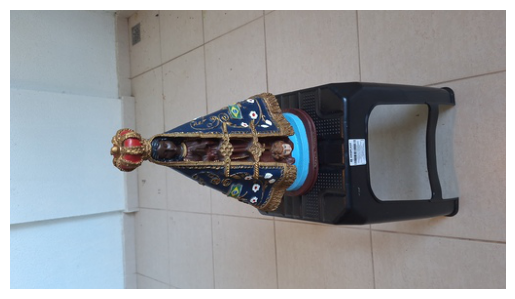

In [ ]:
# How to use imageio:
 
import matplotlib.pyplot as plt
import imageio
import numpy as np

# Load the image using imageio
rgb_file = "./aparecida/undistorted_8/images/20250105_164818.jpg"
image = imageio.imread(rgb_file).astype(np.float32)  / 255.0

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'depth map')

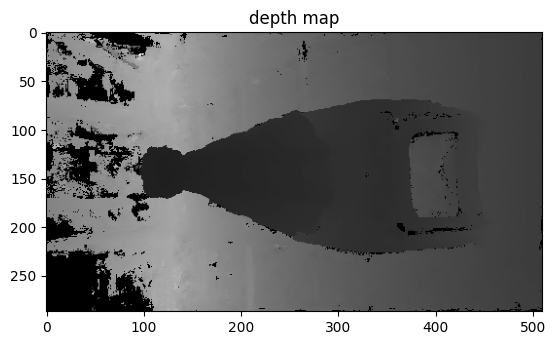

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def read_array(path):
    with open(path, "rb") as fid:
        width, height, channels = np.genfromtxt(
            fid, delimiter="&", max_rows=1, usecols=(0, 1, 2), dtype=int
        )
        fid.seek(0)
        num_delimiter = 0
        byte = fid.read(1)
        while True:
            if byte == b"&":
                num_delimiter += 1
                if num_delimiter >= 3:
                    break
            byte = fid.read(1)
        array = np.fromfile(fid, np.float32)
    array = array.reshape((width, height, channels), order="F")
    return np.transpose(array, (1, 0, 2)).squeeze()

depth_map = read_array(r".\aparecida\undistorted_8\stereo\depth_maps\20250105_164818.jpg.geometric.bin")
depth_map2 = read_array(r".\aparecida\undistorted_8\stereo\depth_maps\20250105_164818.jpg.photometric.bin")

# min_depth, max_depth = np.percentile(
#         depth_map, [5, 95]
#     )
# depth_map[depth_map < min_depth] = min_depth
# depth_map[depth_map > max_depth] = max_depth


# Visualize the depth map.
# plt.figure()
# plt.imshow(depth_map,cmap='gray')
plt.imshow(depth_map,cmap='gray')
plt.title("depth map")


In [15]:
depth_map.max(), depth_map.min(), 

(np.float32(33.709167), np.float32(0.0))